In [1]:
func_dir = '/global/home/users/ann_scheliga/CYGNSS-GRACE/codebase/'
data_dir = '/global/scratch/users/ann_scheliga/dam_datasets/'

In [2]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import codebase

from codebase import volume_pipeline

In [13]:
custom_aggs = {'Lake/Reservoir Change In Storage [af]':'sum'}

In [14]:
res_ref_M = codebase.load_data.load_formatted_usbr_data('powell',monthly=True,
                                            agg_kwargs={'custom_aggs':custom_aggs})

In [15]:
res_ref_M

Variable,Lake/Reservoir Area [acres],Lake/Reservoir Bank Storage [af],Lake/Reservoir Change In Storage [af],Lake/Reservoir Elevation [ft],Lake/Reservoir Evaporation [af],Lake/Reservoir Inflow - Unregulated [cfs],Lake/Reservoir Inflow Volume - Unregulated [af],Lake/Reservoir Inflow [af],Lake/Reservoir Inflow [cfs],Lake/Reservoir Release - Bypass [af],Lake/Reservoir Release - Bypass [cfs],Lake/Reservoir Release - Powerplant [af],Lake/Reservoir Release - Powerplant [cfs],Lake/Reservoir Release - Spillway [cfs],Lake/Reservoir Release - Total [af],Lake/Reservoir Release - Total [cfs],Lake/Reservoir Storage [af]
Datetime (UTC),,,,,,,,,,,,,,,,,
2018-01-01,106592.333333,5.163993e+06,-379436.35,3621.084333,291.572967,4288.210667,8505.540333,14355.786667,7237.710000,0.0,0.0,27723.930000,13977.473333,0.0,27723.930000,13977.473333,1.387877e+07
2018-02-01,104713.821429,5.135344e+06,-331960.34,3617.694643,339.879964,4797.685357,9516.068571,13703.986786,6909.096071,0.0,0.0,26168.307143,13193.182143,0.0,26168.307143,13193.182143,1.352064e+07
2018-03-01,102882.870968,5.106508e+06,-387896.41,3614.220968,507.983677,5399.778387,10710.306129,12817.662258,6462.240000,0.0,0.0,25823.490323,13019.338710,0.0,25823.490323,13019.338710,1.316019e+07
2018-04-01,101121.500000,5.079227e+06,-286256.81,3610.879333,812.426967,6414.910667,12723.794000,14018.154333,7067.489667,0.0,0.0,23510.990000,11853.447333,0.0,23510.990000,11853.447333,1.281920e+07
2018-05-01,100631.258065,5.071720e+06,193749.04,3609.949355,930.779226,19193.183871,38069.100000,30412.325806,15332.883226,0.0,0.0,22731.583871,11460.504194,0.0,22731.583871,11460.504194,1.272534e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-01,77100.526667,4.758457e+06,-102029.26,3573.823667,1164.665333,3778.950667,7495.440333,13758.476000,6936.566667,0.0,0.0,16266.870000,8201.208000,0.0,16266.870000,8201.208000,8.809538e+06
2023-10-01,76774.232258,4.753985e+06,-68352.31,3573.096452,789.018097,5146.114194,10207.170323,13819.271935,6967.216774,0.0,0.0,15411.558065,7769.994516,0.0,15411.558065,7769.994516,8.753586e+06
2023-11-01,76334.496667,4.748083e+06,-89305.93,3572.132667,778.602700,6481.568667,12856.000333,14191.309000,7154.782667,0.0,0.0,16627.713333,8383.137333,0.0,16627.713333,8383.137333,8.679800e+06


## Compare in-situ sand trapzoidal storage change estimations

In [7]:
insitu_stor = res_ref_M['Lake/Reservoir Storage [af]']
insitu_area = res_ref_M['Lake/Reservoir Area [acres]']
insitu_elev = res_ref_M['Lake/Reservoir Elevation [ft]']
insitu_stor_diff = res_ref_M['Lake/Reservoir Change In Storage [af]']

In [20]:
calc_diff_insitu_stor = -insitu_stor.diff(periods=-1)
calc_trap_insitu_stor_vec = volume_pipeline.calculate_trapezoidal_volume(area_vec=insitu_area,elev_vec=insitu_elev)

In [21]:
calc_trap_insitu_stor = pd.Series(index=insitu_area.index[:-1],data=calc_trap_insitu_stor_vec)

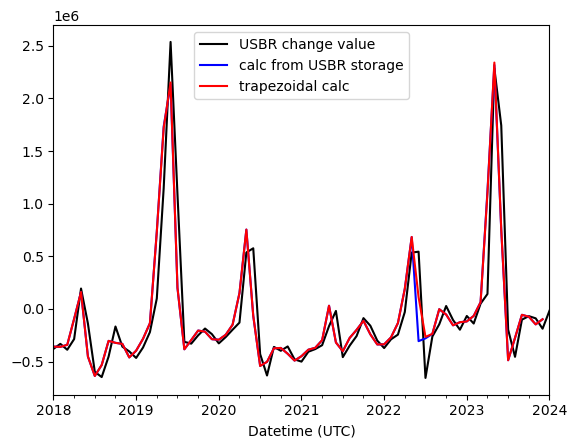

In [24]:
insitu_stor_diff.plot(label='USBR change value',color='k')
calc_diff_insitu_stor.plot(label='calc from USBR storage',color='blue')
calc_trap_insitu_stor.plot(label='trapezoidal calc',color='red')
plt.legend()

## Loading CDEC data

In [3]:
os.listdir(data_dir)

['reservoirs_GRACEyears.prj',
 'reservoirs_GRACEyears_processed0.prj',
 'GRanD_Technical_Documentation_v1_3.pdf',
 'GRanD_dams_v1_3.shx',
 'GRanD_reservoirs_v1_3.dbf',
 'LakePowell_USBR_2018_2023.csv',
 'GRanD_reservoirs_v1_3.sbx',
 'GRanD_dams_v1_3.dbf',
 'reservoirs_GRACEyears.shp',
 'GRanD_dams_v1_3.shp',
 'GRanD_dams_v1_3.sbn',
 'LakeMohave_CDEC_2018_2023.csv',
 'LakeHavasu_CDEC_2018_2023.csv',
 'reservoirs_GRACEyears.dbf',
 'GRanD_reservoirs_v1_3.sbn',
 '.ipynb_checkpoints',
 'GRanD_reservoirs_v1_3.prj',
 'reservoirs_GRACEyears.cpg',
 'reservoirs_GRACEyears_processed0.dbf',
 'LakeHavasu_USBR_2018_2023.csv',
 'reservoirs_GRACEyears_processed0.shx',
 'valuecounts_res_GRACEyears.txt',
 'GRanD_reservoirs_v1_3.shx',
 'reservoirs_GRACEyears_processed0.cpg',
 'LakeMead_USBR_2018_2023.csv',
 'LakeMohave_USBR_2018_2023.csv',
 'GRanD_dams_v1_3.prj',
 'reservoirs_GRACEyears_processed0.shp',
 'GRanD_reservoirs_v1_3.shp',
 'GRanD_dams_v1_3.sbx',
 'reservoirs_GRACEyears.shx']

In [ ]:
455

In [4]:
pd.read_csv(data_dir+'LakeHavasu_CDEC_2018_2023.csv')

,DATE,STORAGE AF
0,11/1/2017,"577,400"
1,12/1/2017,"557,600"
2,1/1/2018,"539,300"
3,2/1/2018,"590,000"
4,3/1/2018,"569,800"
...,...,...
68,7/1/2023,"587,000"
69,8/1/2023,"575,800"
70,9/1/2023,"582,400"
71,10/1/2023,"575,000"


## Loading with no package functions

In [3]:
list_of_filenames = os.listdir(data_dir)
LH_usbr_filename = [fname for fname in list_of_filenames if 'havasu' in fname.lower() and 'usbr' in fname.lower()][0]
LH_cdec_filename = [fname for fname in list_of_filenames if 'havasu' in fname.lower() and 'cdec' in fname.lower()][0]
LM_usbr_filename = [fname for fname in list_of_filenames if 'mohave' in fname.lower() and 'usbr' in fname.lower()][0]
LM_cdec_filename = [fname for fname in list_of_filenames if 'mohave' in fname.lower() and 'cdec' in fname.lower()][0]

In [4]:
LH_usbr_raw = pd.read_csv(data_dir + LH_usbr_filename,header=7)
LM_usbr_raw = pd.read_csv(data_dir + LM_usbr_filename,header=7)
LH_cdec_raw = pd.read_csv(data_dir + LH_cdec_filename)
LM_cdec_raw = pd.read_csv(data_dir + LM_cdec_filename)

In [5]:
def convert_to_num(single_value):
    if isinstance(single_value , (float,int)):
        return single_value
    try:
        float(single_value.replace(',',''))
    except:
        return np.nan
    else:
        return float(single_value.replace(',',''))

In [6]:
def cdec_dataprocessing(df):
    df['DATE'] = pd.to_datetime(df['DATE'])
    df['STORAGE AF'] = df['STORAGE AF'].apply(convert_to_num)
    return df

In [7]:
def usbr_dataprocessing(df):
    df = df.drop(columns='Location')
    df.dropna(axis=0,how='any',inplace=True)
    df =  df[df['Timestep']!='Timestep'] # remove repeat header rows
    df['Variable'] =  df['Parameter'] + ' [' + df['Units'] + ']'
    df['Result'] =    df['Result'].apply(convert_to_num)
    df_pivot = df.pivot(columns='Variable',index='Datetime (UTC)',values='Result')
    return df_pivot

In [32]:
def load_usbr_data(name,file_dir='/global/scratch/users/ann_scheliga/dam_datasets/'):
    try:
        # test if `name` input is a filename
        pd.read_csv(file_dir+name)
    except Exception:
        # if `name` input is a reservoir name, find the filename in the folder
        # list comp looks for reservoir name and "usbr" in file strings
        list_of_filenames = os.listdir(file_dir)
        filename = [fname for fname in list_of_filenames if name.lower() in fname.lower() and 'usbr' in fname.lower()][0]
    else:
        filename = name
    finally:
        raw_data = pd.read_csv(file_dir + filename, header = 7)
    return raw_data

In [33]:
def load_formatted_usbr_data(name,file_dir='/global/scratch/users/ann_scheliga/dam_datasets/'):
    raw_data = load_usbr_data(name,file_dir)
    data = usbr_dataprocessing(raw_data)
    return data

In [34]:
load_formatted_usbr_data('MOhave')

Variable,Lake/Reservoir Elevation [ft],Lake/Reservoir Release - Total [af],Lake/Reservoir Release - Total [cfs],Lake/Reservoir Storage [af],Water Temperature [DegF]
Datetime (UTC),,,,,
2018-01-01 07:00:00,641.045,12891.90,6499.67,1645620.0,70.9285
2018-01-02 07:00:00,641.403,9118.10,4597.04,1655280.0,70.7430
2018-01-03 07:00:00,641.730,10890.00,5490.38,1664110.0,70.5513
2018-01-04 07:00:00,642.106,9099.83,4587.83,1674290.0,70.3678
2018-01-05 07:00:00,642.374,9105.95,4590.92,1681610.0,70.1882
...,...,...,...,...,...
2022-12-28 07:00:00,639.891,19089.80,9624.42,1614590.0,71.0042
2022-12-29 07:00:00,639.905,14285.10,7202.08,1614960.0,70.8353
2022-12-30 07:00:00,639.888,11901.90,6000.54,1614510.0,70.6636


In [8]:
LH_cdec = cdec_dataprocessing(LH_cdec_raw)
LM_cdec = cdec_dataprocessing(LM_cdec_raw)

LH_usbr = usbr_dataprocessing(LH_usbr_raw)
LM_usbr = usbr_dataprocessing(LM_usbr_raw)

<Axes: xlabel='Datetime (UTC)'>

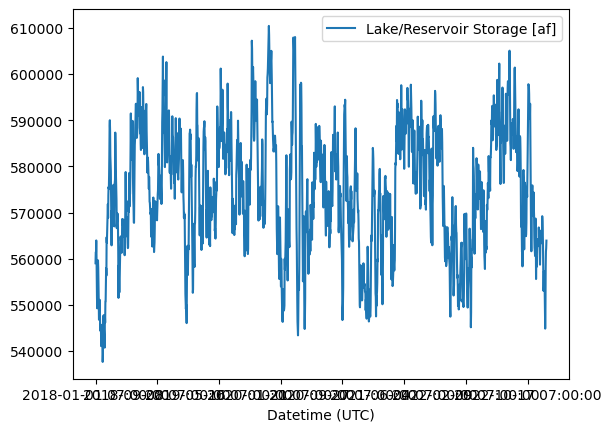

In [38]:
LH_usbr.plot(y='Lake/Reservoir Storage [af]')